<a href="https://colab.research.google.com/github/muhafidz-ahmad/ecommerce-text-analysis-and-classification/blob/main/analisis_data_dan_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis dan Klasifikasi Data Teks E-commerce

## Pendahuluan
* Ecommerce (perdagangan elektronik) semakin marak di era digitalisasi ini. Dengan ecommerce, semua orang memiliki akses untuk masuk ke dalamnya akan lebih mudah untuk melakukan aktivitas jual beli barang maupun jasa. Sehingga semakin lama, produk yang dijual di ecommerce akan semakin besar dan sulit untuk dikendalikan.
* Dengan teknologi machine learning, data-data produk yang terdapat di dalam ecommerce akan dengan mudah dikendalikan dengan memberikan label pada produk-produk tersebut secara otomatis.

<p align="center">
  <img src="https://static.vecteezy.com/system/resources/previews/001/871/349/non_2x/illustration-of-shopping-and-spending-money-with-e-commerce-apps-own-your-own-shop-with-e-commerce-find-the-right-item-with-online-shops-landing-page-template-for-web-websites-site-banner-flyer-free-vector.jpg" alt="Ecommerce" width="500">
  <figcaption align="center">Ecommerce (Sumber: vecteezy/naki-sama)</figcaption>
</p>

Data yang digunakan pada proyek ini diperoleh dari [kaggle](https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification).

Data terdiri dari puluhan ribu teks dari ecommerce beserta label dari tiap teks tersebut.

## Persiapan Package

In [1]:
!pip install wordcloud==1.8.1

import string
import re
import pathlib
import json

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import initializers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.0/372.0 KB 12.3 MB/s eta 0:00:00
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Import Data Dari Kaggle

Upload file kaggle.json agar bisa impor data dari [kaggle](https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification) secara langsung ke google colab.

Kemudian data dari kaggle akan diunduh dan diekstrak menjadi file dengan format csv yang dapat dibaca menggunakan pandas.

In [2]:
from google.colab import files
files.upload()

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d saurabhshahane/ecommerce-text-classification
!unzip /content/ecommerce-text-classification.zip -d /content/

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
 64% 5.00M/7.86M [00:00<00:00, 34.8MB/s]
100% 7.86M/7.86M [00:00<00:00, 46.9MB/s]
Archive:  /content/ecommerce-text-classification.zip
  inflating: /content/ecommerceDataset.csv  


## Persiapan Data

Import data csv menjadi dataframe menggunakan pandas

In [3]:
df = pd.read_csv('/content/ecommerceDataset.csv',
                 engine='python',
                 error_bad_lines=False,
                 names=['label', 'text'])
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


Data mentah ini terdiri 50245 baris dan memiliki 4 kategori yang biasa ada di e-commerce, yaitu:
1. household (barang rumah tangga)
2. clothing & accessories
3. books
4. electronics

## Data Cleansing

Periksa apakah terdapat data duplikat.

In [4]:
df.duplicated().value_counts()

False    27803
True     22622
dtype: int64

Terdapat 22622 data duplikat.

Selanjutnya hapus data/record/baris duplikat tersebut.

In [5]:
df.drop_duplicates(inplace=True)

Hapus juga data yang hilang/kosong.

In [6]:
df.isnull().sum()

label    0
text     1
dtype: int64

In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27802 entries, 0 to 50410
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   27802 non-null  object
 1   text    27802 non-null  object
dtypes: object(2)
memory usage: 651.6+ KB


## Ubah Label Menjadi One Hot Encoding

Kolom label tiap teks akan dipecah dengan one hot encoding.
Sehingga kolom label akan berubah menjadi beberapa kolom dengan nama tiap labelnya.

Dengan one hot encoding, maka data label bisa dimasukan ke dalam pelatihan model machine learning.

In [8]:
df_label = pd.get_dummies(df['label'])
df_one = pd.concat([df['text'], df_label], axis=1)
df_one.head()

,text,Books,Clothing & Accessories,Electronics,Household
0,Paper Plane Design Framed Wall Hanging Motivat...,0,0,0,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0,0,0,1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,0,0,0,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",0,0,0,1
4,Incredible Gifts India Wooden Happy Birthday U...,0,0,0,1


In [9]:
labels_list = df_one.columns[1:]
labels_list

Index(['Books', 'Clothing & Accessories', 'Electronics', 'Household'], dtype='object')

Di bawah adalah contoh teks beserta labelnya yang sudah berbentuk one hot encoding.

In [10]:
text = df_one['text'].values
labels = df_one[labels_list].values
print(">>> Teks:")
print(text[:2])
print()
print(">>> Label:")
print(labels[:2])

>>> Teks:
['Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for e

## Text Preprocessing

Terdapat 3 tahap preprocessing yang dilakukan:
1. Case folding, yaitu mengubah semua huruf menjadi huruf kecil.
2. Menghapus tanda baca.
3. Menghapus stopword.

Adapun proses tokenizing dilakukan setelahnya.

Di bawah adalah contoh teks yang telah dilakukan preprocessing.

In [11]:
stop_words = STOPWORDS

def preprocessing(t):
  # mengubah semua huruf menjadi huruf kecil
  lower_text = t.lower()
  # menghapus tanda baca
  del_punc = "".join([char for char in lower_text if char not in string.punctuation])
  # menghapus stopword
  del_stopword = " ".join([word for word in del_punc.split() if word not in stop_words])
  return del_stopword

for i, t in enumerate(text):
  text[i] = preprocessing(t)

text[:2]

array(['paper plane design framed wall hanging motivational office decor art prints 87 x 87 inch set 4 painting made synthetic frame uv textured print gives multi effects attracts towards special series paintings makes wall beautiful gives royal touch painting ready hang proud possess unique painting niche apart use modern efficient printing technology prints inks precision epson roland hp printers innovative hd printing technique results durable spectacular looking prints highest last lifetime print solely topnotch 100 inks achieve brilliant true colours due high level uv resistance prints retain beautiful colours many years add colour style living space digitally printed painting pleasure eternal blissso bring home elegant print lushed rich colors makes nothing sheer elegance friends familyit treasured forever whoever lucky recipient liven place intriguing paintings high definition hd graphic digital prints home office room',
       'saf floral framed painting wood 30 inch x 10 inch 

## Exploratory Data Analysis

### Analisis Data Teks

Pertama, akan dilihat distribusi jumlah teks tiap label pada data menggunakan visualisasi diagram pie.

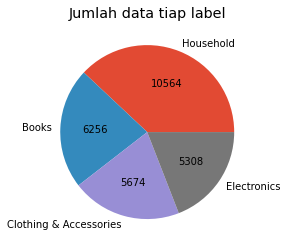

In [12]:
label_counts = df['label'].value_counts()

plt.pie(label_counts.values,
        labels = label_counts.index,
        autopct = lambda x : int(np.round(x/100*label_counts.sum(), 0)))
plt.title("Jumlah data tiap label")
plt.show()

Selanjutnya akan dilihat statistik panjang teks pada tiap label.

In [13]:
df['jumlah_kata'] = df['text'].str.split().str.len()
print(">>> Statistik jumlah kata data teks sebelum preprocessing\n")
len_text = df.groupby('label').agg({'jumlah_kata': [max, min, np.mean, np.median]})['jumlah_kata']
print(len_text)

>>> Statistik jumlah kata data teks sebelum preprocessing

                         max  min        mean  median
label                                                
Books                   8181    1  139.979380    73.0
Clothing & Accessories   581    1   72.629186    56.0
Electronics             1997    1  130.456104    97.0
Household               1791    1  107.005869    84.0


Statistik di atas didapatkan pada data teks yang belum dilakukan preprocessing.

Adapun setelah dilakukan preprocessing, diperoleh statistik sebagai berikut.

In [14]:
df['jumlah_kata'] = df['text'].apply(lambda x: len(preprocessing(x).split()))
print(">>> Statistik jumlah kata data teks setelah preprocessing\n")
len_text2 = df.groupby('label').agg({'jumlah_kata': [max, min, np.mean, np.median]})['jumlah_kata']
print(len_text2)

>>> Statistik jumlah kata data teks setelah preprocessing

                         max  min       mean  median
label                                               
Books                   4554    1  84.363971    47.0
Clothing & Accessories   337    1  49.363588    38.0
Electronics             1425    1  91.916918    69.0
Household                938    1  72.567209    58.0


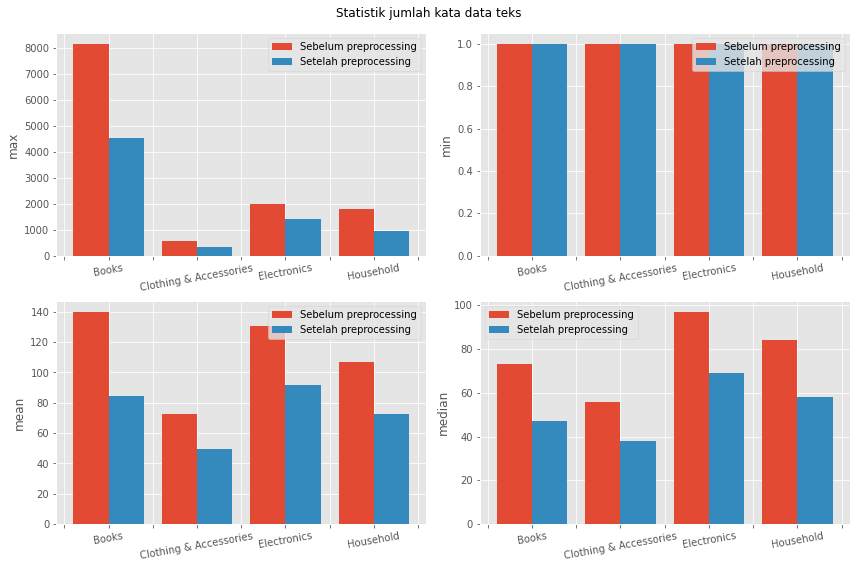

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle("Statistik jumlah kata data teks")

temp_label = ['', '', 'Books',
              '', 'Clothing & Accessories',
              '', 'Electronics',
              '', 'Household']

for i, stat in enumerate(len_text):
  row = int(i/2)
  col = i%2

  ax[row,col].bar(np.arange(4) - 0.2, len_text[stat], 0.4, label='Sebelum preprocessing')
  ax[row,col].bar(np.arange(4) + 0.2, len_text2[stat], 0.4, label='Setelah preprocessing')
  ax[row,col].set_ylabel(stat)
  ax[row,col].set_xticklabels(temp_label, rotation = 10)
  ax[row,col].legend()

fig.tight_layout()
fig.subplots_adjust(top=0.935)

### Word Cloud

Gabungkan semua teks pada setiap label

In [16]:
stop_words = STOPWORDS

label_text = dict()

for label in df.label.unique():
  text_nya = str()
  for item in df.loc[df.label==label].text:
    text_nya += preprocessing(item)
  label_text[label] = text_nya

Generate wordcloud

In [17]:
wc_dict = dict()

for label in label_text:
  wc_dict[label] = WordCloud(
      background_color='white',
      max_words=2000
  )
  
  wc_dict[label].generate(label_text[label])

Visualisasi word cloud

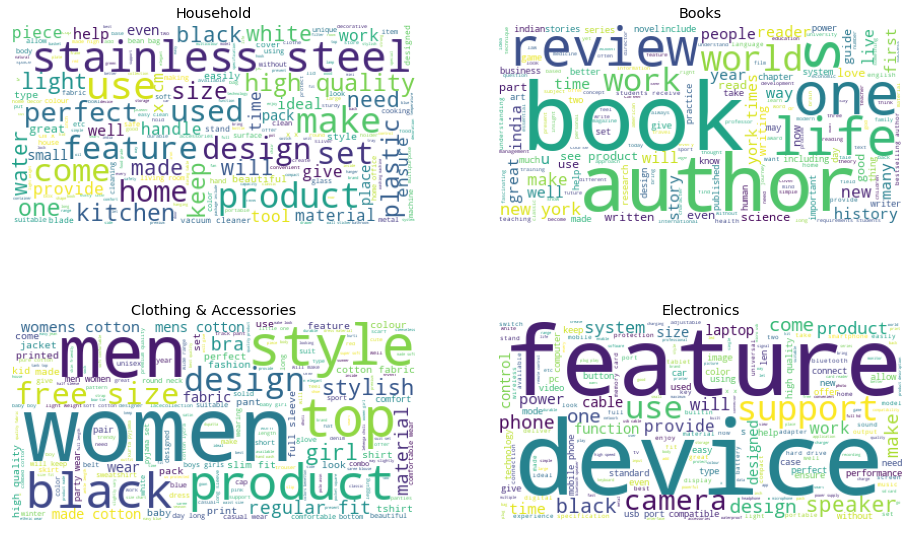

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(16,10))

for i, label in enumerate(df.label.unique()):
  row = int(i/2)
  col = i % 2

  ax[row,col].imshow(wc_dict[label])
  ax[row,col].set_title(label)
  ax[row,col].set_xticks([])
  ax[row,col].set_yticks([])

## Pemisahan Data Latih dengan Data Uji

Data latih sebesar 80% dari total data.

Data validasi sebesar 20% dari total data.

In [19]:
x_train, x_val, y_train, y_val = train_test_split(text,
                                                  labels,
                                                  test_size=0.2,
                                                  random_state=45)

## Tokenizer

Mengubah data teks yang awalnya berbentuk kalimat menjadi pecahan kata-kata atau token-token.

* Maksimal kosakata yang diambil untuk tokenizing adalah sebanyak 15000 berdasarkan kata yang paling sering muncul.
* Maksimal panjang array dalam satu data diatur sebanyak 1000.
* Jika jumlah kata dalam suatu data kurang dari 1000 kata, maka dalam array hasil tokenisasi, sisa nilai diakhirnya akan diatur menjadi 0.

In [20]:
NUM_WORDS = 15000

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token='')

tokenizer.fit_on_texts(x_train)

seq_train = tokenizer.texts_to_sequences(x_train)
seq_val = tokenizer.texts_to_sequences(x_val)

x_train = pad_sequences(seq_train, padding='post',
                        maxlen=1000, truncating='post')
x_val = pad_sequences(seq_val, padding='post', 
                      maxlen=1000, truncating='post')

print(len(tokenizer.word_index))
print(x_train.max())
print(len(x_val[0]))

106857
14999
1000


Simpan index kosa kata ke dalam file json.

In [25]:
word_index = tokenizer.word_index
 
with open('word_index.json', 'w') as fp:
    json.dump(word_index, fp)

## Membuat Model Machine Learning

Model yang akan digunakan adalah Bidirectional LSTM dengan konfigurasi sebagai berikut:

* 1 BiLSTM Layer dengan jumlah hidden state 16 dan dropout 0,5
* 1 Dense Layer dengan jumlah hidden state 32 dan dropout 0,5 serta fungsi aktivasi relu
* Output Layer dengan fungsi aktivasi softmax
* Optimizer Adam
* Learning rate = 0,001
* Epochs = 10, namun jika akurasi validasi telah mencapai lebih dari 95%, proses pelatihan akan langsung berhenti
* Batch size = 512


In [21]:
highest_acc_train = [0,0]
highest_acc_test = [0,0]

class myCallback(keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        global highest_acc_train, highest_acc_test

        target_acc = 0.95

        if logs.get('acc') > target_acc and logs.get('val_acc') > target_acc:
            print("\nThe accuracy has reached >", target_acc)
            self.model.stop_training = True
        if logs.get('acc') > highest_acc_train[0]:
            highest_acc_train[0] = logs.get('acc')
            highest_acc_train[1] = epoch+1
        if logs.get('val_acc') > highest_acc_test[0]:
            highest_acc_test[0] = logs.get('val_acc')
            highest_acc_test[1] = epoch+1
            
early_stopping = keras.callbacks.EarlyStopping(patience=3, 
                                               monitor='val_acc',
                                               min_delta=0.01,
                                               verbose=1)

callbacks = myCallback()


model = models.Sequential([
    layers.Embedding(input_dim=NUM_WORDS, output_dim=32),
    layers.Bidirectional(layers.LSTM(16, dropout=0.5)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(labels_list), activation='softmax')
])

model.summary()

model.compile(loss=losses.CategoricalCrossentropy(),
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

hist = model.fit(x_train, y_train,
                 epochs=10,
                 batch_size=512,
                 validation_data=(x_val, y_val),
                 validation_steps=5,
                 verbose=2,
                 callbacks=[callbacks])

print("\nHighest training accuracy: %.4f | epoch: %i"%(highest_acc_train[0], 
                                                       highest_acc_train[1]))
print("Highest validation accuracy: %.4f | epoch: %i"%(highest_acc_test[0],
                                                       highest_acc_test[1]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          480000    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               6272      
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 487,460
Trainable params: 487,460
Non-trainable params: 0
__________________________________________________

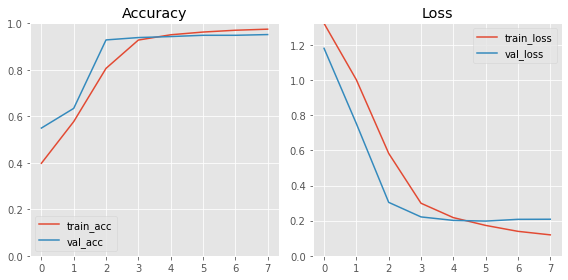

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))

ax[0].plot(hist.history['acc'], label = 'train_acc')
ax[0].plot(hist.history['val_acc'], label = 'val_acc')
ax[0].set_title('Accuracy')
ax[0].legend()
ax[0].set_ylim(0, 1)

ax[1].plot(hist.history['loss'], label = 'train_loss')
ax[1].plot(hist.history['val_loss'], label = 'val_loss')
ax[1].legend()
ax[1].set_title('Loss')
ax[1].set_ylim([0,max(hist.history['loss'] + hist.history['val_loss'])])

fig.tight_layout()
plt.show()

## Simpan Model

In [23]:
!pip install tensorflowjs

model.save("model.h5")

!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.4/197.4 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━